https://bskyvision.com/851   
svm에 대한 자세한 설명 : https://bskyvision.com/163


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import missingno as msno

In [6]:
df = pd.read_csv('/content/drive/MyDrive/슬기로운 건강생활/data/health_data_01.csv', encoding='utf-8')
df

,성별,나이,bmi,비만여부,혈색소,빈혈여부,식전혈당(공복혈당),당뇨여부,(혈청지오티)AST,AST구분,(혈청지오티)ALT,ALT구분,AST/ALT비율,감마 지티피,GTP/ALT비율,음주여부,간 수치
0,0,40,22.0,0,15.0,0,90.0,0,21.0,0,27.0,0,0.777778,21.0,0.777778,0.0,0
1,1,60,28.9,1,12.7,1,87.0,0,18.0,0,15.0,0,1.200000,15.0,1.000000,0.0,0
2,1,50,22.9,0,12.8,1,102.0,1,27.0,0,25.0,0,1.080000,7.0,0.280000,0.0,0
3,0,60,27.3,1,16.4,0,146.0,1,65.0,1,97.0,1,0.670103,72.0,0.742268,0.0,0
4,1,50,20.8,0,12.4,1,110.0,1,18.0,0,17.0,0,1.058824,14.0,0.823529,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987327,1,60,26.2,1,13.6,0,124.0,1,21.0,0,25.0,0,0.840000,18.0,0.720000,0.0,0
987328,1,50,21.5,0,14.0,0,98.0,0,21.0,0,14.0,0,1.500000,19.0,1.357143,1.0,0
987329,0,40,22.9,0,16.0,0,83.0,0,26.0,0,20.0,0,1.300000,17.0,0.850000,1.0,0
987330,1,40,27.3,1,11.9,1,111.0,1,25.0,0,29.0,0,0.862069,13.0,0.448276,0.0,0


In [7]:
# train_a = train.truncate(after='100',axis=0)

train = df.drop(labels=range(100000, 987332), axis=0)

train

,성별,나이,bmi,비만여부,혈색소,빈혈여부,식전혈당(공복혈당),당뇨여부,(혈청지오티)AST,AST구분,(혈청지오티)ALT,ALT구분,AST/ALT비율,감마 지티피,GTP/ALT비율,음주여부,간 수치
0,0,40,22.0,0,15.0,0,90.0,0,21.0,0,27.0,0,0.777778,21.0,0.777778,0.0,0
1,1,60,28.9,1,12.7,1,87.0,0,18.0,0,15.0,0,1.200000,15.0,1.000000,0.0,0
2,1,50,22.9,0,12.8,1,102.0,1,27.0,0,25.0,0,1.080000,7.0,0.280000,0.0,0
3,0,60,27.3,1,16.4,0,146.0,1,65.0,1,97.0,1,0.670103,72.0,0.742268,0.0,0
4,1,50,20.8,0,12.4,1,110.0,1,18.0,0,17.0,0,1.058824,14.0,0.823529,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,40,22.9,0,15.1,0,117.0,1,28.0,0,59.0,1,0.474576,119.0,2.016949,1.0,0
99996,1,40,25.4,1,13.8,0,99.0,0,56.0,1,70.0,1,0.800000,16.0,0.228571,1.0,0
99997,1,60,24.4,1,12.8,1,113.0,1,34.0,0,25.0,0,1.360000,148.0,5.920000,1.0,1
99998,1,50,21.5,0,13.7,0,108.0,1,18.0,0,17.0,0,1.058824,43.0,2.529412,1.0,1


In [8]:
# 빈혈
cond1 = (train['성별'] == '1')
cond2 = (train['혈색소'] < 12)
cond3 = (train['혈색소'] < 13)

train.loc[cond1&cond2, '빈혈여부'] = "1" # 여자 and 혈색소 < 12 : 빈혈
train.loc[~cond1&~cond2, '빈혈여부'] = "0" # 여자 and 혈색소 >= 12 : 빈혈 아님
train.loc[~cond1&cond3, '빈혈여부'] = "1" # 남자 and 혈색소 < 13 : 빈혈
train.loc[~cond1&~cond3, '빈혈여부'] = "0" # 남자 and 혈색소 >= 13 : 빈혈 아님

In [9]:
train['빈혈여부'].describe()

count     100000
unique         2
top            0
freq       80486
Name: 빈혈여부, dtype: object

In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
svm_model = svm.SVC()

print(svm_model._estimator_type)

classifier


In [11]:
# feature와 target 분리
yt=np.array(train['빈혈여부'])
xt=train.drop(['빈혈여부'], axis=1)
xt=np.array(xt)

In [12]:
# 정규화를 위해서는 데이터의 모든 문자를 숫자로 변환하기
scaler=MinMaxScaler()
xt=scaler.fit_transform(xt)

In [13]:
# train test 데이터 split
xtrain,xtest,ytrain,ytest=train_test_split(xt, yt, test_size=0.2, random_state=42)

## C값 검색
- C 값이 커지면 허용 오차의 개수가 작아짐   
 -> 가중치 값에 집중하는 경항 발생   
 -> margin 좁아짐


In [15]:
#Linear SVM을 위한 적절한 C값  검색
#분류:SVC, 회귀(예측):SVR

scores = []
for thisC in [*range(1,10)]:
    svc=SVC(kernel='linear',C=thisC)
    model=svc.fit(xtrain,ytrain)
    scoreTrain=model.score(xtrain,ytrain)
    scoreTest=model.score(xtest,ytest)
    print("선형 SVM : C:{}, training score:{:2f}, test score:{:2f}".format
          (thisC,scoreTrain, scoreTest))
    scores.append([scoreTrain, scoreTest])

선형 SVM : C:1, training score:0.992175, test score:0.991850
선형 SVM : C:2, training score:0.998200, test score:0.997400
선형 SVM : C:3, training score:0.994012, test score:0.993550
선형 SVM : C:4, training score:1.000000, test score:1.000000
선형 SVM : C:5, training score:1.000000, test score:1.000000
선형 SVM : C:6, training score:1.000000, test score:1.000000
선형 SVM : C:7, training score:1.000000, test score:1.000000
선형 SVM : C:8, training score:1.000000, test score:1.000000
선형 SVM : C:9, training score:1.000000, test score:1.000000


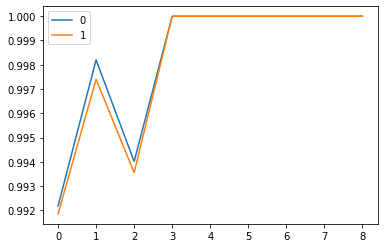

In [16]:
# C값에 따른 train test 정확도 비교
pd.DataFrame(scores).plot()

## 모델 훈련

In [17]:
from sklearn.svm import SVC
 
svm_model = SVC(C=4)
 
svm_model.fit(xtrain, ytrain) # SVM 분류 모델 훈련

SVC(C=4)

In [18]:
y_pred = svm_model.predict(xtest) # 테스트

In [19]:
print("예측된 라벨:", y_pred)
print("ground-truth 라벨:", ytest)

예측된 라벨: ['0' '0' '1' ... '1' '0' '0']
ground-truth 라벨: ['0' '0' '1' ... '1' '0' '0']


In [20]:
print("prediction accuracy: {:.2f}".format(np.mean(y_pred == ytest))) # 예측 정확도

prediction accuracy: 1.00
